In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
# from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os


In [2]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
# Creating training set
training_set = train_datagen.flow_from_directory('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 487 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


In [4]:
training_set.class_indices

{'earVentilationTube': 0, 'normal': 1, 'otitisexterna': 2, 'tympanoskleros': 3}

In [5]:
history = load_model('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/result2.hdf5')

In [6]:
print(history.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 256)       3328      
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 128)       65664     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 128)       0         
                                                           

In [7]:
# model.save('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [8]:
# history = load_model('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [9]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/test', # Put your path here
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# predictions = model.predict(test_set, steps=test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis = 1)

Found 124 images belonging to 4 classes.
4/4 [==============================] - 6s 862ms/step


In [10]:
predictions

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+

In [11]:
predicted_classes

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [13]:
true_classes

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3])

In [14]:
# class_labels

In [15]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                    precision    recall  f1-score   support

earVentilationTube       1.00      0.50      0.67         4
            normal       0.82      1.00      0.90       100
     otitisexterna       0.00      0.00      0.00        16
    tympanoskleros       0.00      0.00      0.00         4

          accuracy                           0.82       124
         macro avg       0.45      0.38      0.39       124
      weighted avg       0.69      0.82      0.75       124



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
true_classes

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3])

In [17]:
class_labels

['earVentilationTube', 'normal', 'otitisexterna', 'tympanoskleros']

<AxesSubplot: >

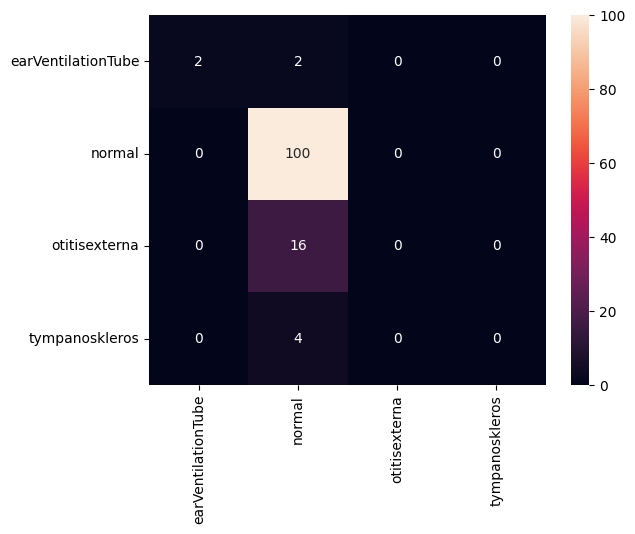

In [18]:
from sklearn.metrics import confusion_matrix
# y_prded_labels = predicted_classes
# y_test = true_classes
# plt.figure(figsize(16 , 9))
import seaborn as sns
cm = confusion_matrix(true_classes , predicted_classes)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels = class_labels)

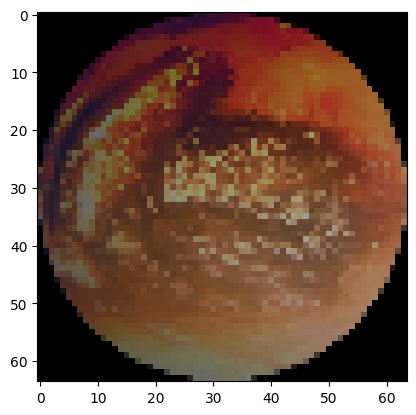

1/1 [==============================] - 1s 880ms/step
earwax (34).png


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
dir_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/test'

# img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# plt.imshow(img)

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = history.predict(images)
  print(i)
  if val == 0:
    print("abnormal")
  else:
    print("normal")